In [41]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Bharath Marupatla\OneDrive\Documents\analyst\ml\flight_price_prediction\Clean_Dataset.csv")

In [42]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [43]:
df.airline.value_counts() 

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [44]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [45]:
df.arrival_time.value_counts() 

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [46]:
df.stops.value_counts() 

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [47]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [48]:
df.duration.value_counts() 

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
41.08       1
35.67       1
47.08       1
44.50       1
41.50       1
Name: count, Length: 476, dtype: int64

In [49]:
df['duration'].max()

np.float64(49.83)

In [50]:
df['duration'].median()

np.float64(11.25)

In [51]:
df = df.drop('Unnamed: 0', axis=1) 
df = df.drop('flight', axis=1)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [52]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0) 
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,1,10.00,49,81585


In [53]:
df.stops = pd.factorize(df.stops)[0]
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [54]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)  # One-hot encode the 'airline' column
df = df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)  # One-hot encode the 'source_city' column
df = df.join(pd.get_dummies(df.destination_city, prefix='destination')).drop('destination_city', axis=1)  # One-hot encode the 'destination_city' column
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)  # One-hot encode the 'arrival_time' column
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)  # One-hot encode the 'departure_time' column
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [56]:
x, y = df.drop('price', axis=1), df.price
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)  
reg = RandomForestRegressor(n_jobs=-1)

In [57]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [60]:
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [61]:
print('R2:', r2_score(y_test, y_pred))  # R-squared value
print('MSE:', mean_squared_error(y_test, y_pred))  # Mean Squared Error
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9852578013006487
MSE: 7622869.802436706
RMSE: 2760.9545093023003


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

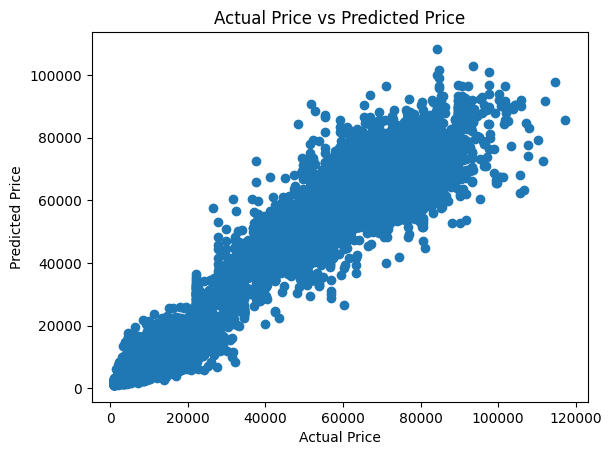

In [62]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)  # Scatter plot of actual vs predicted prices
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

Feature Importance

Text(0.5, 1.0, 'Feature Importances')

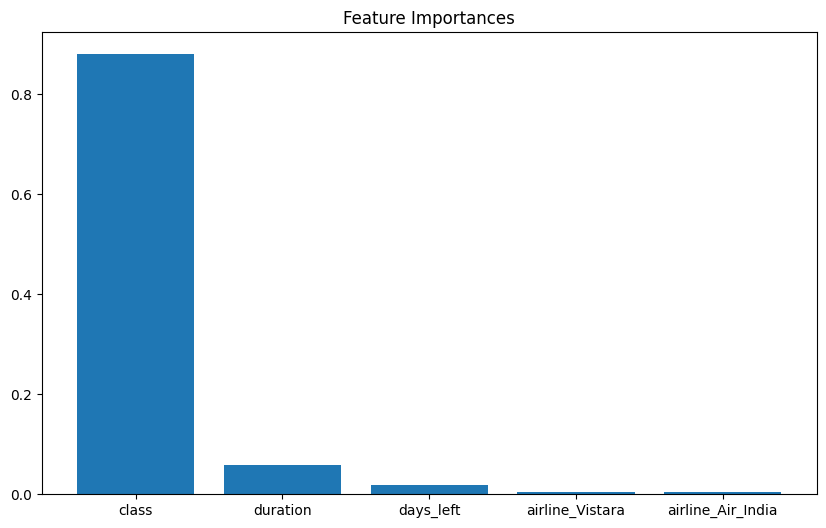

In [63]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])  # Top 5 features
plt.title('Feature Importances')

HYPERPARAMETER TUNING

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [65]:
param_dist = {
    'n_estimators': randint(100, 300),  # Randomly choose number of trees between 100 and 300
    'max_depth': [None, 10, 20, 30, 40, 50],  # Different depths for trees
    'min_samples_split': randint(2, 11),  # Minimum samples needed to split
    'min_samples_leaf': randint(1, 5),  # Minimum samples in leaf node
    'max_features': [1.0, 'auto', 'sqrt']  # Maximum features considered
}

In [66]:
random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3, scoring='neg_mean_squared_error',verbose=2, random_state=10, n_jobs=-1)
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


c:\Users\Bharath Marupatla\OneDrive\Desktop\python_files\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Bharath Marupatla\OneDrive\Desktop\python_files\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Bharath Marupatla\OneDrive\Desktop\python_files\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Bharath Marupatla\OneDrive\Desktop\python_files\myenv\Lib\

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [1.0, 'auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023287DEDDF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023287DD1430>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023287DAD4F0>},
                   random_state=10, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
best_regressor = random_search.best_estimator_

In [ ]:
best_regressor.score(x_test, y_test)
y_pred = best_regressor.predict(x_test)

In [ ]:
print('R2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price (Best Model)')